In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [119]:
top5_open_df = pd.DataFrame(pd.read_csv("top5CA_OpenSchools.csv"))
top5_closed_df = pd.DataFrame(pd.read_csv("top5CA_ClosedSchools.csv"))

In [120]:
top5_closed_df.head()

,CDSCode,NCESDist,NCESSchool,StatusType,County,District,School,Street,StreetAbr,City,...,SOC,SOCType,EdOpsCode,EdOpsName,EILCode,EILName,Virtual,Magnet,Latitude,Longitude
0,4.310000e+13,691035.0,11316.0,Closed,Santa Clara,Santa Clara County Office of Education,EDGE,258 Sunol Street MC 331,258 Sunol St. MC 331,San Jose,...,69.0,District Community Day Schools,COMMDAY,Community Day School,HS,High School,NaN,NaN,37.324874,-121.90609
1,4.310000e+13,691035.0,11441.0,Closed,Santa Clara,Santa Clara County Office of Education,Leadership Public Schools - San Jose,1881 Cunningham Avenue,1881 Cunningham Ave.,San Jose,...,66.0,High Schools (Public),TRAD,Traditional,HS,High School,N,N,37.330395,-121.82878
2,4.310000e+13,691035.0,11443.0,Closed,Santa Clara,Santa Clara County Office of Education,Pathfinder High,370-B South King Road,370-B South King Rd.,San Jose,...,66.0,High Schools (Public),TRAD,Traditional,HS,High School,NaN,NaN,NaN,NaN
3,4.310000e+13,691035.0,11790.0,Closed,Santa Clara,Santa Clara County Office of Education,Advent Community Day,1290 Ridder Park Drive MC 213,1290 Ridder Park Dr. MC 213,San Jose,...,69.0,District Community Day Schools,COMMDAY,Community Day School,HS,High School,NaN,NaN,NaN,NaN
4,4.310000e+13,691035.0,12185.0,Closed,Santa Clara,Santa Clara County Office of Education,South Bay Preparatory,1290 Ridder Park Drive MC 243,1290 Ridder Park Dr. MC 243,San Jose,...,65.0,K-12 Schools (Public),TRAD,Traditional,ELEMHIGH,Elementary-High Combination,NaN,NaN,37.383703,-121.90134


In [132]:
top5_open_df["ClosedDate"] = ""
all_turnover_df = pd.concat([top5_open_df,top5_closed_df])

all_turnover_sj = all_turnover_df.loc[(all_turnover_df["City"] == "San Jose")]
close_sj = all_turnover_sj.loc[all_turnover_sj["StatusType"].isin("Closed","Merged")]
open_sj = all_turnover_sj.loc[all_turnover_sj["StatusType"].isin("Active","Pending")]

all_turnover_la = all_turnover_df.loc[all_turnover_df["City"] == "Los Angeles"]
close_la = all_turnover_la.loc[all_turnover_la["StatusType"].isin("Closed","Merged")]
open_la = all_turnover_la.loc[all_turnover_la["StatusType"].isin("Active","Pending")]

all_turnover_sf = all_turnover_df.loc[all_turnover_df["City"] == "San Francisco"]
close_sf = all_turnover_sf.loc[all_turnover_sf["StatusType"].isin("Closed","Merged")]
open_sf = all_turnover_sf.loc[all_turnover_sf["StatusType"].isin("Active","Pending")]

all_turnover_sd = all_turnover_df.loc[all_turnover_df["City"] == "San Diego"]
close_sd = all_turnover_sd.loc[all_turnover_sd["StatusType"].isin("Closed","Merged")]
open_sd = all_turnover_sd.loc[all_turnover_sd["StatusType"].isin("Active","Pending")]

all_turnover_fr = all_turnover_df.loc[all_turnover_df["City"] == "Fresno"]
close_fr = all_turnover_fr.loc[all_turnover_fr["StatusType"].isin("Closed","Merged")]
open_fr = all_turnover_fr.loc[all_turnover_fr["StatusType"].isin("Active","Pending")]



TypeError: isin() takes 2 positional arguments but 3 were given

In [133]:
all_turnover_df.dtypes

CDSCode        float64
Charter         object
CharterNum     float64
City            object
ClosedDate      object
County          object
DOC              int64
DOCType         object
District        object
EILCode         object
EILName         object
EdOpsCode       object
EdOpsName       object
FundingType     object
Latitude       float64
Longitude      float64
Magnet          object
NCESDist       float64
NCESSchool     float64
OpenDate        object
SOC            float64
SOCType         object
School          object
State           object
StatusType      object
Street          object
StreetAbr       object
Virtual         object
Zip             object
dtype: object

In [134]:
all_turnover_fr["StatusType"].value_counts()

Active     31
Closed     17
Merged      7
Pending     1
Name: StatusType, dtype: int64

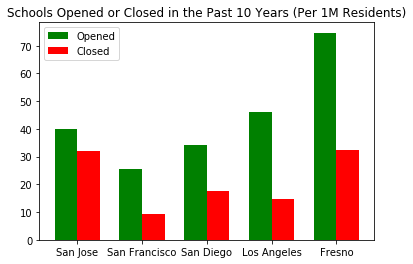

In [138]:
N=5

closedschools = [close_sj["StatusType"].count()/1.025,
                 close_sf["StatusType"].count()/0.864,
                 close_sd["StatusType"].count()/1.407,
                 close_la["StatusType"].count()/3.976,
                 close_fr["StatusType"].count()/0.522]

openedschools = [open_sj["StatusType"].count()/1.025,
                  open_sf["StatusType"].count()/0.864,
                  open_sd["StatusType"].count()/1.407,
                  open_la["StatusType"].count()/3.976,
                  open_fr["StatusType"].count()/0.522]

fig, ax = plt.subplots()

ind = np.arange(N)
width = 0.35

p1 = ax.bar(ind, openedschools , width, color='g')
p2 = ax.bar(ind + width, closedschools, width,
            color='r')

ax.set_title('Schools Opened or Closed in the Past 10 Years (Per 1M Residents)')
ax.set_xticks(ind + width / 2)


ax.set_xticklabels(('San Jose', 'San Francisco', 'San Diego', 'Los Angeles', 'Fresno'))
ax.legend((p1[0], p2[0]), ('Opened', 'Closed'))
ax.autoscale_view()

plt.savefig("Open-Close_top5")
plt.show()

In [139]:
ocharter_sj = open_sj.loc[open_sj["Charter"] == "Y"]
opublic_sj = open_sj.loc[open_sj["Charter"] == "N"]

ocharter_la = open_la.loc[open_la["Charter"] == "Y"]
opublic_la = open_la.loc[open_la["Charter"] == "N"]

ocharter_sf = open_sf.loc[open_sf["Charter"] == "Y"]
opublic_sf = open_sf.loc[open_sf["Charter"] == "N"]

ocharter_sd = open_sd.loc[open_sd["Charter"] == "Y"]
opublic_sd = open_sd.loc[open_sd["Charter"] == "N"]

ocharter_fr = open_fr.loc[open_fr["Charter"] == "Y"]
opublic_fr = open_fr.loc[open_fr["Charter"] == "N"]

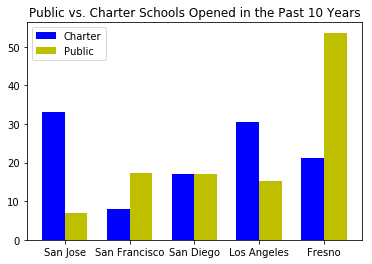

In [140]:
N=5

charterschools = [ocharter_sj["StatusType"].count()/1.025,
                  ocharter_sf["StatusType"].count()/0.864,
                  ocharter_sd["StatusType"].count()/1.407,
                  ocharter_la["StatusType"].count()/3.976,
                  ocharter_fr["StatusType"].count()/0.522]

publicschools = [opublic_sj["StatusType"].count()/1.025,
                 opublic_sf["StatusType"].count()/0.864,
                 opublic_sd["StatusType"].count()/1.407,
                 opublic_la["StatusType"].count()/3.976,
                 opublic_fr["StatusType"].count()/0.522]

fig, ax = plt.subplots()

ind = np.arange(N)
width = 0.35

p1 = ax.bar(ind, charterschools , width, color='b')
p2 = ax.bar(ind + width, publicschools, width,
            color='y')

ax.set_title('Public vs. Charter Schools Opened in the Past 10 Years')
ax.set_xticks(ind + width / 2)


ax.set_xticklabels(('San Jose', 'San Francisco', 'San Diego', 'Los Angeles', 'Fresno'))
ax.legend((p1[0], p2[0]), ('Charter', 'Public'))
ax.autoscale_view()

plt.savefig("PvC-Open")
plt.show()

In [141]:
ccharter_sj = close_sj.loc[close_sj["Charter"] == "Y"]
cpublic_sj = close_sj.loc[close_sj["Charter"] == "N"]

ccharter_la = close_la.loc[close_la["Charter"] == "Y"]
cpublic_la = close_la.loc[close_la["Charter"] == "N"]

ccharter_sf = close_sf.loc[close_sf["Charter"] == "Y"]
cpublic_sf = close_sf.loc[close_sf["Charter"] == "N"]

ccharter_sd = close_sd.loc[close_sd["Charter"] == "Y"]
cpublic_sd = close_sd.loc[close_sd["Charter"] == "N"]

ccharter_fr = close_fr.loc[close_fr["Charter"] == "Y"]
cpublic_fr = close_fr.loc[close_fr["Charter"] == "N"]

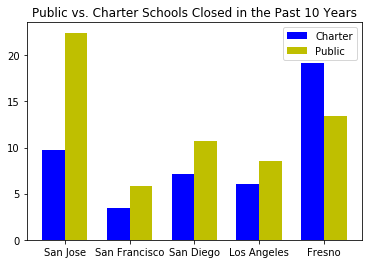

In [142]:
N=5

ccharterschools = [ccharter_sj["StatusType"].count()/1.025,
                  ccharter_sf["StatusType"].count()/0.864,
                  ccharter_sd["StatusType"].count()/1.407,
                  ccharter_la["StatusType"].count()/3.976,
                  ccharter_fr["StatusType"].count()/0.522]

cpublicschools = [cpublic_sj["StatusType"].count()/1.025,
                 cpublic_sf["StatusType"].count()/0.864,
                 cpublic_sd["StatusType"].count()/1.407,
                 cpublic_la["StatusType"].count()/3.976,
                 cpublic_fr["StatusType"].count()/0.522]

fig, ax = plt.subplots()

ind = np.arange(N)
width = 0.35

p1 = ax.bar(ind, ccharterschools , width, color='b')
p2 = ax.bar(ind + width, cpublicschools, width,
            color='y')

ax.set_title('Public vs. Charter Schools Closed in the Past 10 Years')
ax.set_xticks(ind + width / 2)


ax.set_xticklabels(('San Jose', 'San Francisco', 'San Diego', 'Los Angeles', 'Fresno'))
ax.legend((p1[0], p2[0]), ('Charter', 'Public'))
ax.autoscale_view()

plt.savefig("PvC-Closed")
plt.show()